In [2]:
# set env LD_LIBRARY_PATH to install_path
import os
# install_path = "/Users/yumengxu/Project/Physics/cwb/cwb_source/tools/install/lib"
install_path = "/Users/yumengxu/Project/Physics/cwb/cwb_O4/cwb/tools/install/lib"
os.environ['LD_LIBRARY_PATH'] = install_path

# load user parameters
from pycwb.config import Config, CWBConfig
from pycwb import logger_init
cwb_config = CWBConfig('./config.ini')
cwb_config.export_to_envs()
logger_init()

config = Config('./user_parameters_mdc.yaml')

gps_end_time = 1264131194.580

23-02-22 11:34:18 - load_ini - INFO - Loaded config from ./config.ini
23-02-22 11:34:18 - export_to_envs - INFO - Environment variables loaded


In [3]:
from pycwb.modules.read_data import read_from_config

data = read_from_config(config)

23-02-22 11:34:26 - <module> - INFO - Loading wavelet library
23-02-22 10:34:28 - read_from_gwf - INFO - Reading data from /Users/yumengxu/Project/Physics/cwb/pyBurst/tests/frames/L-L1_BurstBenchmark-1264130816-1024.gwf from L1:STRAIN_BURST_0
23-02-22 10:34:33 - read_from_gwf - INFO - Reading data from /Users/yumengxu/Project/Physics/cwb/pyBurst/tests/frames/H-H1_BurstBenchmark-1264130816-1024.gwf from H1:STRAIN_BURST_0


23-02-21 20:48:30 - whitening - INFO - calculate noise rms
23-02-21 20:48:30 - whitening - INFO - high pass filtering at 16Hz
23-02-21 20:48:30 - whitening - INFO - whiten  0 phase WSeries
23-02-21 20:48:30 - whitening - INFO - whiten 90 phase WSeries
23-02-21 20:48:30 - whitening - INFO - calculate noise rms
23-02-21 20:48:30 - whitening - INFO - high pass filtering at 16Hz
23-02-21 20:48:30 - whitening - INFO - whiten  0 phase WSeries
23-02-21 20:48:30 - whitening - INFO - whiten 90 phase WSeries
Filter length = 3073,  norm = 0.9999999999707190
Filter length = 3073,  norm = 0.9999999999707190
Filter length = 12289,  norm = 0.9999999999707191
Filter length = 12289,  norm = 0.9999999999707191


input_line_63:2:15: warning: instantiation of variable 'WDM<double>::Cos' required here, but no definition is available [-Wundefined-var-template]
 WDM<double>::Cos;
              ^
/Users/yumengxu/Project/Physics/cwb/cwb_O4/cwb/WDM.hh:137:19: note: forward declaration of template entity is here
   static double *Cos[MAXBETA], *Cos2[MAXBETA], *SinCos[MAXBETA];
                  ^
input_line_63:2:15: note: add an explicit instantiation declaration to suppress this warning if 'WDM<double>::Cos' is explicitly instantiated in another translation unit
 WDM<double>::Cos;
              ^
input_line_64:2:15: warning: instantiation of variable 'WDM<double>::Cos2' required here, but no definition is available [-Wundefined-var-template]
 WDM<double>::Cos2;
              ^
/Users/yumengxu/Project/Physics/cwb/cwb_O4/cwb/WDM.hh:137:34: note: forward declaration of template entity is here
   static double *Cos[MAXBETA], *Cos2[MAXBETA], *SinCos[MAXBETA];
                                 ^
input_line_6

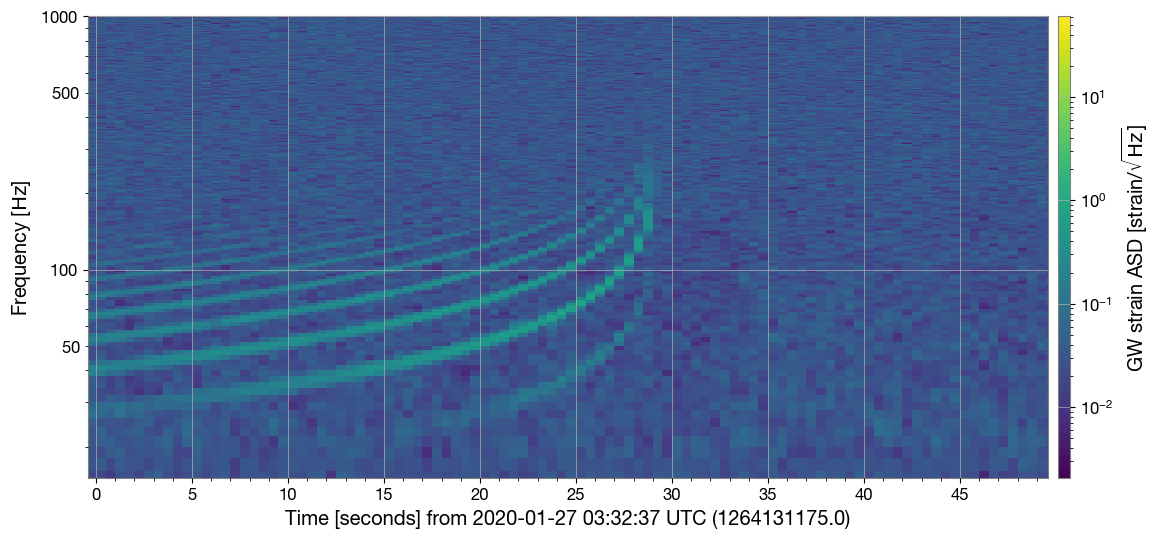

In [3]:
from pycwb.utils import convert_pycbc_timeseries_to_wavearray
from pycwb.modules.plot import plot_spectrogram
wavearray = [convert_pycbc_timeseries_to_wavearray(d) for d in data]
# plot_spectrogram(wavearray[0], xmin=gps_end_time-20, xmax=gps_end_time+30, gwpy_plot=True)

# data conditioning
from pycwb.modules.data_conditioning import regression, whitening
data_reg = [regression(config, wavearray[i]) for i in range(len(config.ifo))]
# plot_spectrogram(data_reg[0], xmin=gps_end_time-20, xmax=gps_end_time+30, gwpy_plot=True)

data_w_reg = [whitening(config, data_reg[i]) for i in range(len(config.ifo))]
tf_map = [d['TFmap'] for d in data_w_reg]
plot_spectrogram(data_w_reg[0]['TFmap'], xmin=gps_end_time-20, xmax=gps_end_time+30, gwpy_plot=True)

In [4]:
# initialize network
from pycwb.modules.coherence import create_network
net, wdm_list = create_network(1, config, data_w_reg)

23-02-21 20:48:44 - load_MRA - INFO - Loading MRA
23-02-21 20:48:44 - create_wdm - INFO - Filter length = 6.00048828125 (sec)
23-02-21 20:48:44 - create_wdm - INFO - Filter length = 3.00048828125 (sec)
23-02-21 20:48:44 - create_wdm - INFO - Filter length = 1.50048828125 (sec)
23-02-21 20:48:44 - create_wdm - INFO - Filter length = 0.75048828125 (sec)
23-02-21 20:48:44 - create_wdm - INFO - Filter length = 0.37548828125 (sec)
23-02-21 20:48:44 - create_wdm - INFO - Filter length = 0.18798828125 (sec)
23-02-21 20:48:44 - create_wdm - INFO - Filter length = 0.09423828125 (sec)
23-02-21 20:48:44 - init_network - INFO - Initializing network
23-02-21 20:48:44 - init_network - INFO - Adding ifo L1
23-02-21 20:48:44 - init_network - INFO - Adding ifo H1
23-02-21 20:48:44 - update_sky_map - INFO - Setting skymaps
23-02-21 20:48:45 - init_network - INFO - Restoring network parameters
23-02-21 20:48:45 - update_sky_mask - INFO - Setting sky mask
23-02-21 20:48:45 - set_liv_time - INFO - lag step

In [5]:
from pycwb.modules.coherence import coherence
sparse_table_list, cluster_list = coherence(config, net, tf_map, wdm_list)

23-02-21 20:48:45 - coherence - INFO - level : 10	 rate(hz) : 2	 layers : 1024	 df(hz) : 1.000000	 dt(ms) : 500.000000
23-02-21 20:48:51 - coherence - INFO - max energy in units of noise variance: 1.39905
23-02-21 20:48:51 - coherence - INFO - thresholds in units of noise variance: Eo=167.856 Emax=335.713
23-02-21 20:48:51 - coherence - INFO - live time in zero lag: 1004
23-02-21 20:48:52 - coherence - INFO - lag | clusters | pixels 
23-02-21 20:48:54 - coherence - INFO -   0 |       18 |    725 
23-02-21 20:48:54 - coherence - INFO - level : 9	 rate(hz) : 4	 layers : 512	 df(hz) : 2.000000	 dt(ms) : 250.000000
23-02-21 20:49:00 - coherence - INFO - max energy in units of noise variance: 1.4049
23-02-21 20:49:00 - coherence - INFO - thresholds in units of noise variance: Eo=141.166 Emax=282.333
23-02-21 20:49:00 - coherence - INFO - live time in zero lag: 1004
23-02-21 20:49:01 - coherence - INFO - lag | clusters | pixels 
23-02-21 20:49:01 - coherence - INFO -   0 |       44 |    696 

In [6]:
from pycwb.modules.super_cluster import supercluster
supercluster(config, net, wdm_list, cluster_list, sparse_table_list)

23-02-21 20:49:32 - update_sky_map - INFO - Setting skymaps
23-02-21 20:49:32 - update_sky_mask - INFO - Setting sky mask
23-02-21 20:49:32 - supercluster - INFO - -> Processing lag=0 ...
23-02-21 20:49:32 - supercluster - INFO -    --------------------------------------------------
23-02-21 20:49:32 - supercluster - INFO -     coher clusters|pixels      :    189|3937
23-02-21 20:49:32 - supercluster - INFO -     super clusters|pixels      :      9|3111
23-02-21 20:49:33 - supercluster - INFO -    defrag clusters|pixels      :      8|3111
23-02-21 20:49:33 - supercluster - INFO -    subnet clusters|pixels      :      6|3076
23-02-21 20:49:33 - supercluster - INFO - Supercluster done
23-02-21 20:49:33 - supercluster - INFO - total  clusters|pixels|frac :      6|3076|0.988750


(<cppyy.gbl.netcluster object at 0x7f92b83717b0>,
 <cppyy.gbl.netcluster object at 0x7f92bb22bec0>)

In [7]:
from pycwb.modules.netpixel import get_time_frequency
points = [get_time_frequency(cluster_list[0],p) for c in cluster_list for p in c.pList]

(0.0, 1000.0)

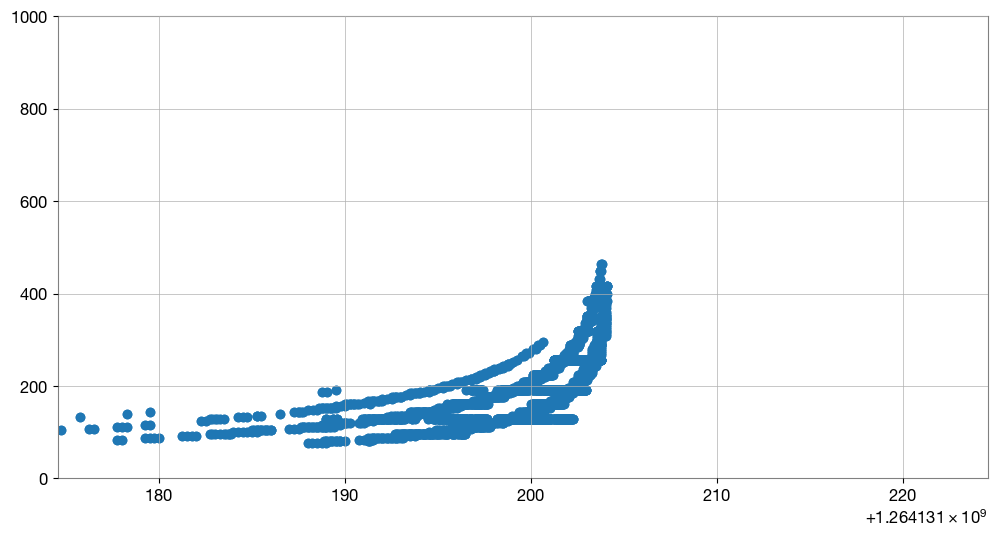

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter([p[0] for p in points], [p[1] for p in points])
# xmin=gps_end_time-20, xmax=gps_end_time+30
plt.xlim((gps_end_time-20, gps_end_time+30))
plt.ylim((0,1000))

In [9]:
import argparse, shlex

parser = argparse.ArgumentParser(description='Example with long option names')

parser.add_argument('--theta', default=-1000, type=float)
parser.add_argument('--phi', default=-1000, type=float)
parser.add_argument('--radius', default=-1000, type=float)
args = parser.parse_args(shlex.split('--theta 1 --radius 3'))

args

Namespace(theta=1.0, phi=-1000, radius=3.0)